In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import pydotplus
from IPython.display import Image  

### Read the images

In [2]:
before_images = {}
after_images = {}
difference_images = {}

for i in range(1,26):
    before_images[i] = cv2.imread("data/before/" + str(i) + ".jpg")
    after_images[i] = cv2.imread("data/after/" + str(i) + ".jpg")
    difference_images[i] = cv2.subtract(after_images[i],before_images[i])
    
labels = pd.read_table("data/deforestation_labels.txt", header=None)

### Plot some images

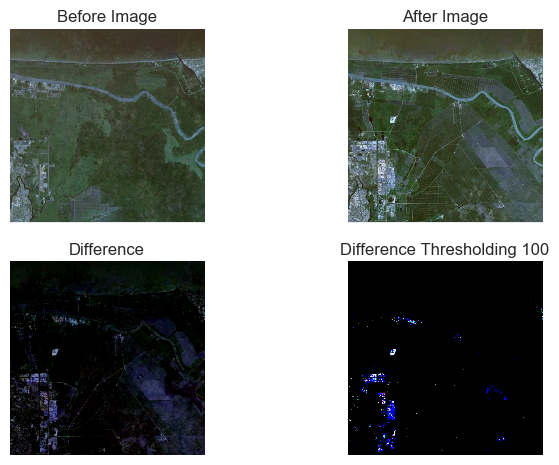

In [3]:
#Example with deforestation

before = before_images[1]
after = after_images[1]
difference = difference_images[1]

#Threshold image
ret,thresh1 = cv2.threshold(difference,100,255,cv2.THRESH_BINARY)


titles = ['Before Image', 'After Image','Difference', 'Difference Thresholding 100']
images = [before, after, difference, thresh1]

for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


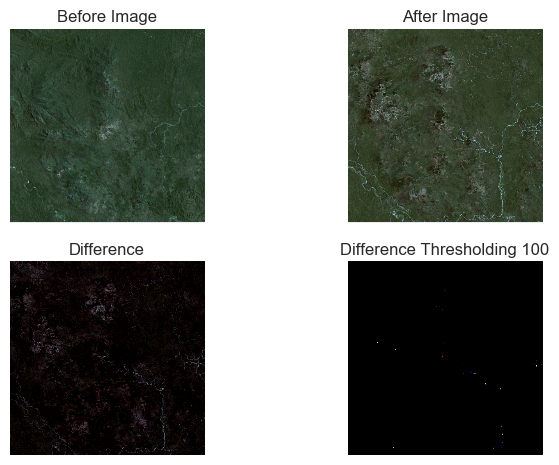

In [4]:
#Example without deforestation

before = before_images[4]
after = after_images[4]
difference = difference_images[4]

#Threshold image
ret,thresh1 = cv2.threshold(difference,120,255,cv2.THRESH_BINARY)


titles = ['Before Image', 'After Image','Difference', 'Difference Thresholding 100']
images = [before, after, difference, thresh1]

for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()



### Extract number of white pixels in the thresholded image for classification

In [5]:
threshold_images= {}
white_counts = list()
white_mean = list()

for i in range(1,26):
    ret,thresh1 = cv2.threshold(difference_images[i],100,255,cv2.THRESH_BINARY)
    threshold_images[i] = thresh1
    white_counts.append(thresh1.sum())
    white_mean.append(thresh1.mean())

white_df = pd.DataFrame()
white_df['WhiteCount'] = white_counts
white_df['WhiteMean'] = white_mean
white_df['Deforestation'] = labels

In [6]:
white_df

,WhiteCount,WhiteMean,Deforestation
0,1347165,1.79622,1
1,22440,0.02992,0
2,2694330,3.59244,1
3,177990,0.23732,0
4,3193620,4.25816,1
5,46410,0.06188,0
6,1905615,2.54082,1
7,255,0.00034,0
8,2315910,3.08788,1
9,13260,0.01768,0


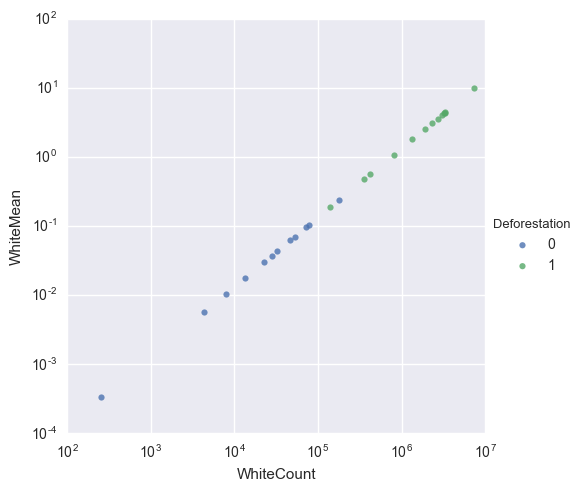

In [7]:
sns.lmplot("WhiteCount", "WhiteMean", data=white_df, hue='Deforestation', fit_reg=False)
plt.xscale("log")
plt.yscale("log")
plt.show()

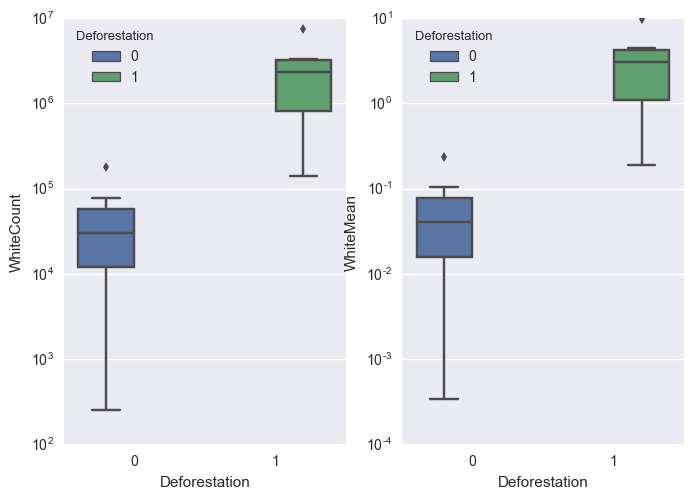

In [8]:
plt.subplot(1,2,1)
sns.boxplot(data=white_df, x="Deforestation", y  = "WhiteCount", hue = "Deforestation")
plt.yscale("log")
plt.subplot(1,2,2)
sns.boxplot(data=white_df, x="Deforestation", y  = "WhiteMean", hue = "Deforestation")
plt.yscale("log")
plt.show()

### Fit a Decision Tree Model

In [11]:
X = white_df[['WhiteCount', 'WhiteMean']]
y = white_df.Deforestation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print("F1-Score: " + str(f1_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

F1-Score: 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         3



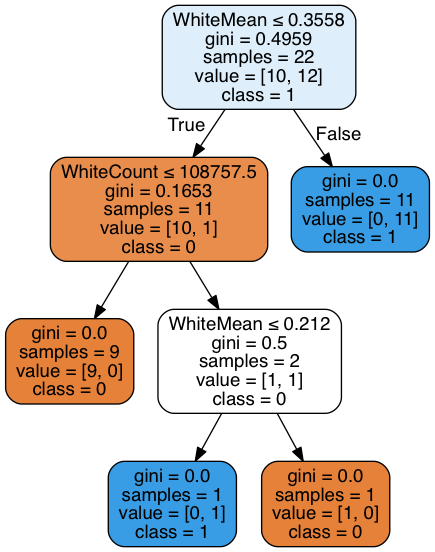

In [12]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=X.columns,  
                         class_names=['0','1'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  